<a href="https://colab.research.google.com/github/kodindonesia/Tutorial-Colab-Roses/blob/master/Tutorial%20Colab%20Roses.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!git clone https://github.com/kodindonesia/kicolab.git

Cloning into 'kicolab'...
remote: Enumerating objects: 19, done.
remote: Counting objects: 100% (19/19), done.
remote: Compressing objects: 100% (17/17), done.
remote: Total 19 (delta 7), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (19/19), done.


In [ ]:
from kicolab.cv import Video_cv, Canvas_cv
a = Video_cv()


239.0 479.0


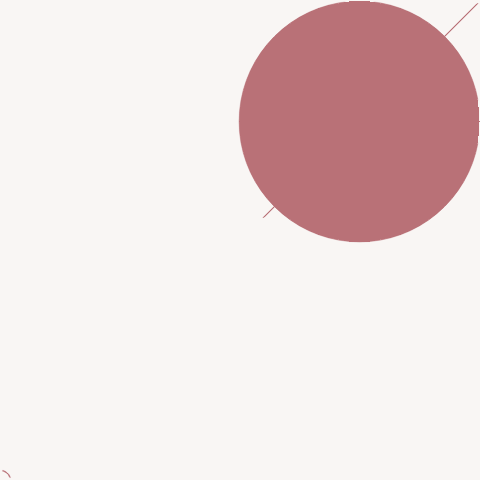

<class 'str'>
<class 'tuple'>


In [ ]:
import cv2 as cv
import numpy as np
from google.colab.patches import cv2_imshow  
from math import sin, cos, radians
from google.colab import files
import os
import subprocess
from collections import namedtuple


class Canvas_cv:
  @staticmethod
  def get_color_rgb(r, g, b):
    return (b,g,r)

  @staticmethod
  def int(n):
    return int(round(n,0))

  @property
  def SOLID(self):  return -1 # for thickness 

  COLORS = {'red':(0,0,255), 'white':(255,255,255), 'black':(0,0,0),
          'blue':(255,0,0),  'grey':(127,127,127), 'green': (0,255,0),
          'yellow': (0,255,255), 'orange': (0,165,255), 'indigo': (130,0,75),
          'violet': (238,130,238), 'vanilla custard':(185,225,240), 'goldfinch':(116,219,243),
          'scarlet sage':(119, 113, 185), 'light orange':(244,246,249), 'gold':(0,215,255)}

  def __init__(self, width=480, height=480, startx=None, starty=None, scale01=0.97,
               color=COLORS['scarlet sage'],
               background_color=COLORS['light orange']):
    self.startx = startx;  self.starty = starty
    self.width = width;  self.height= height
    self.background_color = background_color
    self.size01 = min(width, height)/2.0 * scale01
    self.center_x = self.width/2 - 1;  self.center_y = self.height/2 - 1
    self.color = color
    self.thickness = 1
    self.line_type = cv.LINE_AA
    self.reset_position()
    self.image = np.zeros((self.height,self.width,3), np.uint8); self.clear()

  def reset_position(self):
    self.x = self.center_x
    self.y = self.center_y
    return (self.x, self. y)

  def __set_position_from_xy(self, x=None, y=None):
    '''
    if missing info, resets to the centre
    '''
    self.x = self.center_x  if x is None else x
    self.y = self.center_y  if y is None else y
    return (self.x, self. y)

  def set_position_from_point(self, point):
    '''
    if missing info, resets to the centre
    '''
    p = (None, None) if point is None else point
    return self.__set_position_from_xy(p[0], p[1])

  def clear(self):
    self.image[:,:,:] = self.background_color
    self.reset_position()
    return self.image  

  def show(self):
    cv2_imshow(self.image)

  def set_color_rgb(self, r, g, b):
    self.color = (b, g, r)
    return self.color

  def get_color(self, color_name_or_rgb): 
    color = color_name_or_rgb
    if color is None:
      return self.color
    if isinstance(color, (list, tuple)):
      return (color[2], color[1], color[0])  
    try:
      return Canvas_cv.COLORS[color]
    except:
      print("color '", color, "' is not known")
      return self.color

  def set_color(self, color_name_or_rgb):
    self.color = self.get_color(color_name_or_rgb)
    return self.color

  def set_thickness(self, thickness):
    if not thickness is None: 
      self.thickness=thickness
    return self.thickness

  def set_thickness_to_solid(self):
    self.thickness = -1
    return self.thickness

  def draw_line(self, point1, point2, color=None, thickness=None):
    self.set_color(color)
    old_thickness = self.thickness
    self.set_thickness(thickness)
    point1_ok = self.get_xy_from_point(point1)
    point2_ok = self.get_xy_from_point(point2)
    p1 = self.__point_cv(point1_ok)
    p2 = self.__point_cv(point2_ok)
    cv.line(self.image, p1, p2, self.color, self.thickness, lineType=self.line_type)
    self.set_position_from_point(point2_ok)
    if self.thickness == -1: self.thickness = old_thickness

  def draw_line_to(self, point, color=None, thickness=None):
    self.draw_line((self.x, self.y), point, color=color, thickness=thickness)

  def draw_line_to01(self, point01, color=None, thickness=None):
    self.draw_line01(self.__get_point01_from_point(), point01, color=color, thickness=thickness)

  def draw_line01(self, point01_from, point01_to, color=None, thickness=None):
    self.draw_line( self.get_point_from_point01(point01_from), self.get_point_from_point01(point01_to) , color=color, thickness=thickness)

  def draw_circle(self, radius, center=None, color=None, thickness=None): # thickness=-1 to fill the circle
    self.set_color(color)
    old_thickness = self.thickness
    self.set_thickness(thickness)
    radius_int = Canvas_cv.int(radius)
    center_ok = self.get_xy_from_point(center)
    point_cv = self.__point_cv(center_ok)
    cv.circle(self.image, point_cv, Canvas_cv.int(radius), self.color, self.thickness, lineType=self.line_type)
    self.set_position_from_point(center_ok)
    if self.thickness == -1: self.thickness = old_thickness

  def draw_circle01(self, radius01, center01=None, color=None, thickness=None): # thickness=-1 to fill the circle
    radius = radius01 * self.size01
    center = self.get_point_from_point01(center01)
    self.draw_circle(radius, center=center, color=color, thickness=thickness)

  def get_cirle_point01(self, angle_degrees, radius=1, center01=None):
    x, y = (0, 0) if center01 is None else center01
    x = 0  if x is None else x
    y = 0  if y is None else y
    return ( x + radius * cos(radians(angle_degrees)), y + radius * sin(radians(angle_degrees)))

  def download(self, file_name=None, is_jpg=False):
    extension = '.jpg' if is_jpg else '.png'
    path = 'image' if file_name is None else file_name
    full_path = path + extension
    cv.imwrite(full_path, self.image)   
    files.download(full_path) 

  def get_xy_from_point(self, point):
    if point is None:
      return (self.x, self.y)
    return (point[0], point[1])  

  def get_x_from_x01(self, x01=None):
    if x01 is None:
      return self.x
    return x01 * self.size01 + self.center_x

  def get_y_from_y01(self, y01=None):
    if y01 is None:
      return self.y
    return y01 * self.size01 + self.center_y

  def get_point_from_point01(self, point01=None):
    if point01 is None:
      return (self.x, self.y)
    return (self.get_x_from_x01(point01[0]), self.get_y_from_y01(point01[1]))

  def __get_x01_from_x(self, x=None):
    xx = self.x if x is None else x
    return (xx - self.center_x) / self.size01

  def __get_y01_from_y(self, y=None):
    yy = self.y if y is None else y
    return (yy - self.center_y) / self.size01

  def __get_point01_from_point(self, point=None):
    x = None if point is None else point[0]
    y = None if point is None else point[1]
    return (self.__get_x01_from_x(x), self.__get_y01_from_y(y))

  def __point_cv(self, point):
    x, y = self.get_xy_from_point(point)
    x_int = self.int(x)
    y_int = self.height - self.int(y)
    return ( x_int, y_int )


###############################################
class Video_cv:
  def __init__(self, fps=24, name="video", frame=None, width=480, height=480):
    self.fps = fps
    self.name = name
    self.video_writer = None
    self.frames_count = 0  
    if frame is None:
      self.width = width; self.height= height
      self.frame = np.zeros((self.height,self.width,3), np.uint8) 
    else:
      self.frame = frame
      self.height, self.width, _ = self.__get_image(frame).shape

  def __get_image(self, frame):
    if frame is None:
      return self.get_black_frame()
    if isinstance(frame, Canvas_cv):
        return frame.image
    return frame     

  def show_frame(self, frame=None):
    cv2_imshow(self.__get_image( self.frame if frame is None else frame ))

  def __init_video(self):
    video_size = (self.width, self.height) 
    video_avi = self.name + '.avi'
    if os.path.exists(video_avi): os.remove(video_avi)  
    self.video_writer = cv.VideoWriter(video_avi,  
                         cv.VideoWriter_fourcc(*"XVID"), 
                         self.fps, video_size) 

  def write_frame(self, frame=None):
    image = self.__get_image(self.frame) if frame is None else self.__get_image(frame)
    frame_height, frame_width, _ = image.shape
    if frame_height != self.height or frame_width != self.width:
      print("Error frame size ", frame_width, "x", frame_height, "different than expected ", self.width, "x", self.height)
      return
    if self.frames_count == 0:
      self.__init_video()
    self.video_writer.write(image)
    self.frames_count += 1

  def show(self, file_path=None, download=False):
    import io
    import base64
    from IPython.display import HTML
    if file_path==None:
      file_path = self.name+'.mp4'
    if download:
      self.download()
    video = io.open(file_path, 'r+b').read()
    encoded = base64.b64encode(video)
    return HTML(data='''<video alt="test" controls>
                    <source src="data:video/mp4;base64,{0}" type="video/mp4"/>
                 </video>'''.format(encoded.decode('ascii')))

  def download(self, file_path=None):
    from google.colab import files
    if file_path==None:
      file_path = self.name+'.mp4'
    files.download(file_path) 

  def end_video(self, download=False, show=True):
    self.video_writer.release()  
    self.frames_count = 0  
    result = subprocess.call(['ffmpeg', '-y', '-i', self.name+'.avi', self.name+'.mp4'])
    if download:
      self.download()
    if show:
      return self.show()


###########################################################################
c = Canvas_cv(scale01=1.0)
c.draw_circle(radius=10.1, center=(0.1,0.1))
c.draw_line01((0.1,0.1), (1,1), color='scarlet sage')
c.draw_circle01(radius01=0.5, center01=(0.5,0.5), color='scarlet sage', thickness=c.SOLID)
print(c.get_x_from_x01(0), c.get_y_from_y01(1))
c.show()
print(type('a'))
print(type((12,11,10)))


https://en.wikipedia.org/wiki/Maurer_rose#Python_code

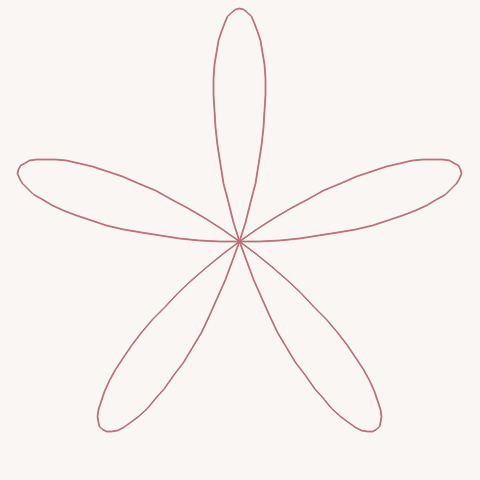

In [ ]:
def maurer_rose_point(canvas, n, angle):
  from math import sin, radians
  radius = sin(radians(n * angle))   
  return canvas.get_cirle_point01(angle_degrees=angle, radius=radius)
  
def draw_maurer_rose(canvas, n, d=1):
  for angle_degrees in range(0, 360):
    angle = d * (angle_degrees + 1)
    point = maurer_rose_point(canvas, n, angle)
    canvas.draw_line_to01(point) 


canvas = Canvas_cv()
draw_maurer_rose(canvas, n=5) # d=97
canvas.show()

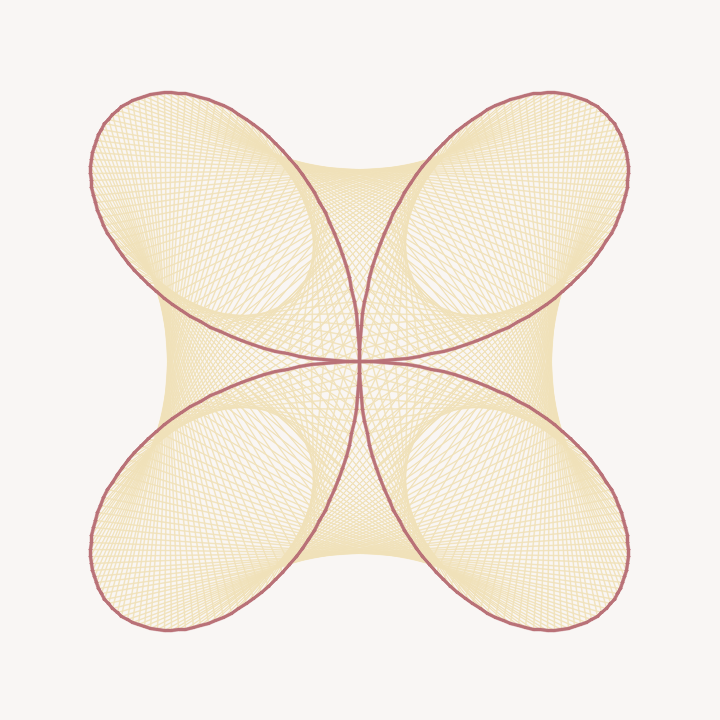

In [ ]:
def draw_maurer_curve_and_lines(canvas, n, d, curve='scarlet sage', lines='vanilla custard', curve_thickness=2):
  # draw lines
  canvas.color = canvas.set_color(lines);  canvas.thickness = 1
  canvas.clear() 
  draw_maurer_rose(canvas, n, d)
  # draw curve
  canvas.color = canvas.set_color(curve);  canvas.thickness = curve_thickness 
  canvas.reset_position() 
  draw_maurer_rose(canvas, n)


canvas = Canvas_cv(width=720, height=720)

draw_maurer_curve_and_lines(canvas, n=2, d=71)

canvas.show()

In [ ]:
canvas.download()
# canvas.download('n2', is_jpg=True) # smaller file with your favourite name

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
d = 71
n_from = 1;  n_to = 31;  n_step = 2
print('d=', d, ',  n from', n_from, 'to', n_to)

canvas = Canvas_cv(width=360, height=360)
vid = Video_cv(fps=2, frame=canvas)

for n in range(n_from, n_to, n_step):  
  draw_maurer_curve_and_lines(canvas, n, d, curve_thickness=1)
  vid.write_frame()

vid.end_video()

d= 71 ,  n from 1 to 31


In [ ]:
d = 71
n_from = 1;  n_to = 6;  step=0.05
print('d=', d, ',  n from', n_from, 'to', n_to)

canvas = Canvas_cv(width=400, height=400)
vid2 = Video_cv(fps=6, name="fractions_of_n", frame=canvas)

import numpy as np 
for n in np.arange(n_from, n_to+step, step): 
  is_partial = round(n, 6) != round(n,0)
  color = 'gold' if is_partial else 'scarlet sage' 
  draw_maurer_curve_and_lines(canvas, n, d, color)
  vid2.write_frame(canvas)

vid2.end_video()

d= 71 ,  n from 1 to 6


In [ ]:
vid.download()
vid2.download()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

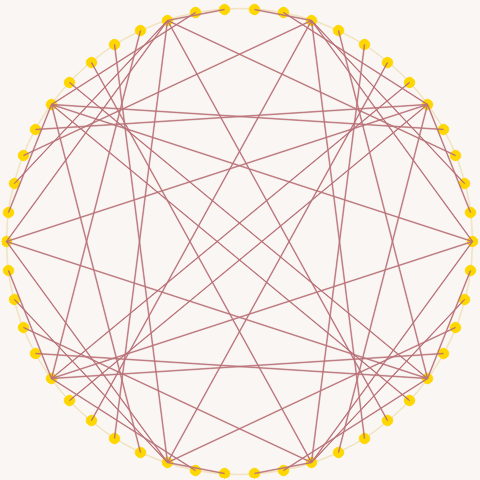

In [ ]:
def plouffe_point(canvas, p_of_n, n, m=1):
  slice_angle = 360 / n
  angle = p_of_n * m * slice_angle
  return canvas.get_cirle_point01(angle)

def draw_plouffe(canvas, m, n):
  for p in range(n):  
    point_from = plouffe_point(canvas, p, n)
    point_to = plouffe_point(canvas, p, n, m)
    canvas.draw_line01(point_from, point_to)

def drar_plouffe_and_circle(canvas, m, n):
  canvas.clear()
  canvas.draw_circle01(radius01=1, center01=(0,0), color='vanilla custard', thickness=1)
  for p in range(n):  
    point_on_circle = plouffe_point(canvas, p, n)
    canvas.draw_circle01(radius01=.02, center01=point_on_circle, color='gold', thickness=-1)
  canvas.set_color('scarlet sage')
  draw_plouffe(canvas, m, n)

canvas = Canvas_cv()
drar_plouffe_and_circle(canvas, m=5, n=50)
canvas.show()  

In [ ]:
canvas.download()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
n = 250
m_from=2; m_to=6; steps=50

canvas = Canvas_cv(width=320,height=320)
vid = Video_cv(fps=6, frame=canvas)

import numpy as np
for m in np.linspace(m_from, m_to, steps):
  drar_plouffe_and_circle(canvas, m, n)
  vid.write_frame(canvas)

vid.end_video()


In [ ]:
vid.download()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>